# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
sales = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', delimiter=';')

In [3]:
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


### Convert the SalesDate field to a datetime data type.

In [5]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


In [7]:
sales["MonthName"] = sales['SalesDate'].dt.strftime('%B')
sales['Day'] = sales['SalesDate'].dt.day
sales['Month'] = sales['SalesDate'].dt.month.astype(str)
sales['Month'] = sales['Month'].str.cat(sales['MonthName'])

sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,MonthName,Day,Month
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,February,5.0,2.0February
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,February,2.0,2.0February
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,May,3.0,5.0May
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,April,7.0,4.0April
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,February,12.0,2.0February


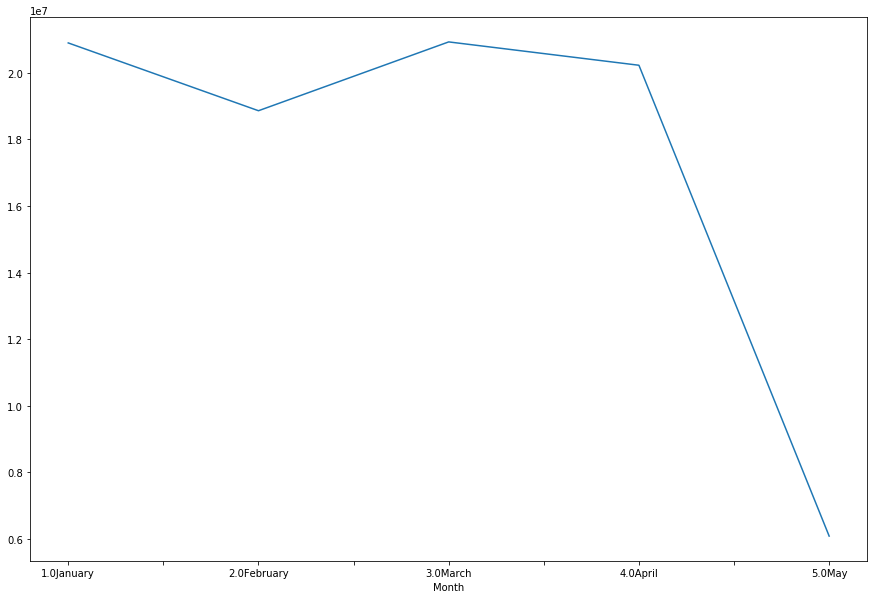

In [8]:
lc_sales = sales.groupby(['Month']).sum()
lc_sales['Quantity'].plot(kind='line', figsize=(15,10))
plt.show()

In [9]:
lc_sales

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,Day
Month,,,,,,,
1.0January,5429914609949,19281120,79391263931,364094537,20900454,48151.3,25725033.0
2.0February,4905090176614,17428784,71647525706,328863295,18862843,43390.8,21062171.0
3.0March,5435329959314,19300510,79507066634,364843159,20930945,48299.2,25767427.0
4.0April,5260210472607,18676567,76840744940,352286567,20229466,46655.6,24122158.0
5.0May,1578062093675,5598051,23095793378,105682188,6079839,13984.1,2334198.0


In [10]:
def linechart(df, x, length=8, width=15, title=""):
  plt.style.use(['dark_background'])
  if df.index.name != x:
    df = df.set_index(x)
  ax = df.plot(figsize=(width, length), cmap="Set2")
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)
  plt.title(title + "\n", fontsize=20)

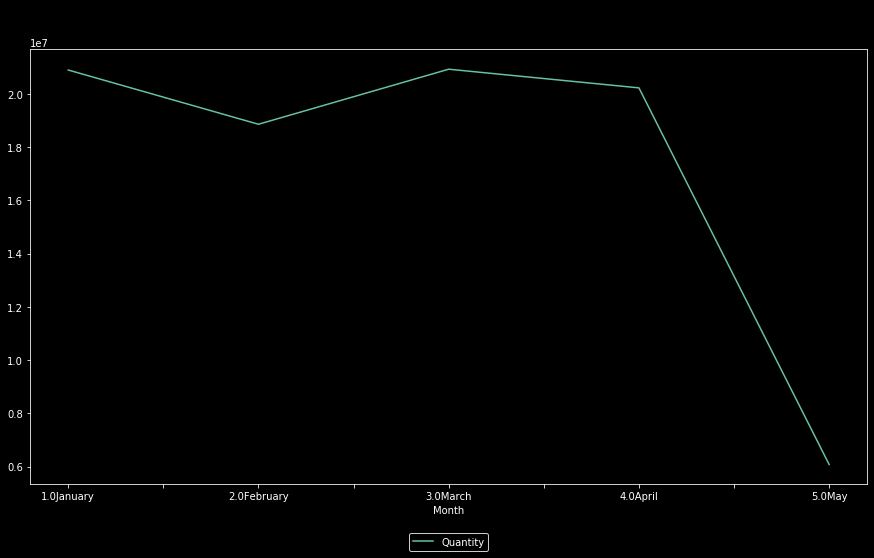

In [11]:
linechart(lc_sales['Quantity'], 'Month')

### Create a line chart showing the number of total units sold per day in February.

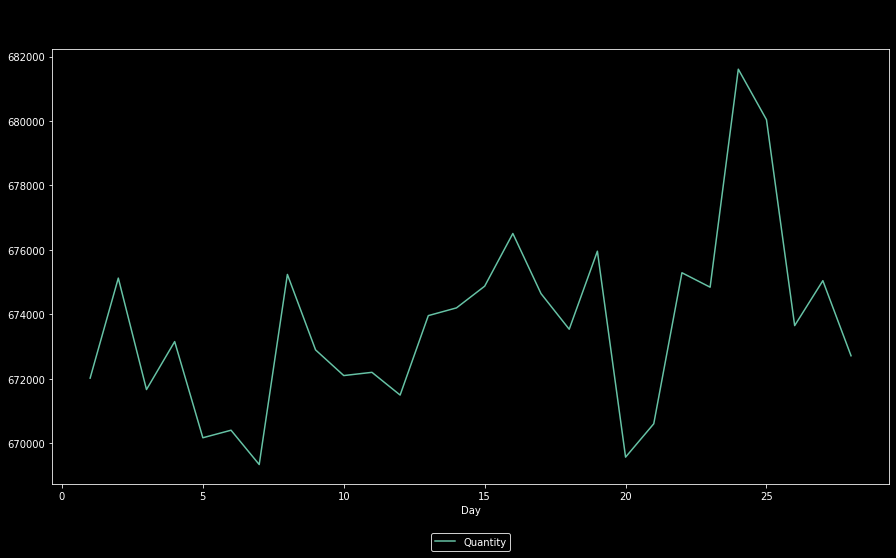

In [12]:
feb = sales[sales['Month'] == '2.0February'][['Day', 'Month', 'Quantity']].groupby(['Day']).sum()
linechart(feb, 'Day')

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [13]:
products = [124, 344, 407,449]
mar = sales[sales['Month'] == '3.0March']
mar = mar[mar['ProductID'].isin(products)]
mar = mar.pivot_table(index='Day', columns='ProductID', values='Quantity', aggfunc='sum')
mar.head()

ProductID,124,344,407,449
Day,,,,
1.0,1617,1413,1696,1343
2.0,1737,1374,1733,1292
3.0,1309,1695,1486,1432
4.0,1308,1675,1323,1466
5.0,1645,1182,1540,1467


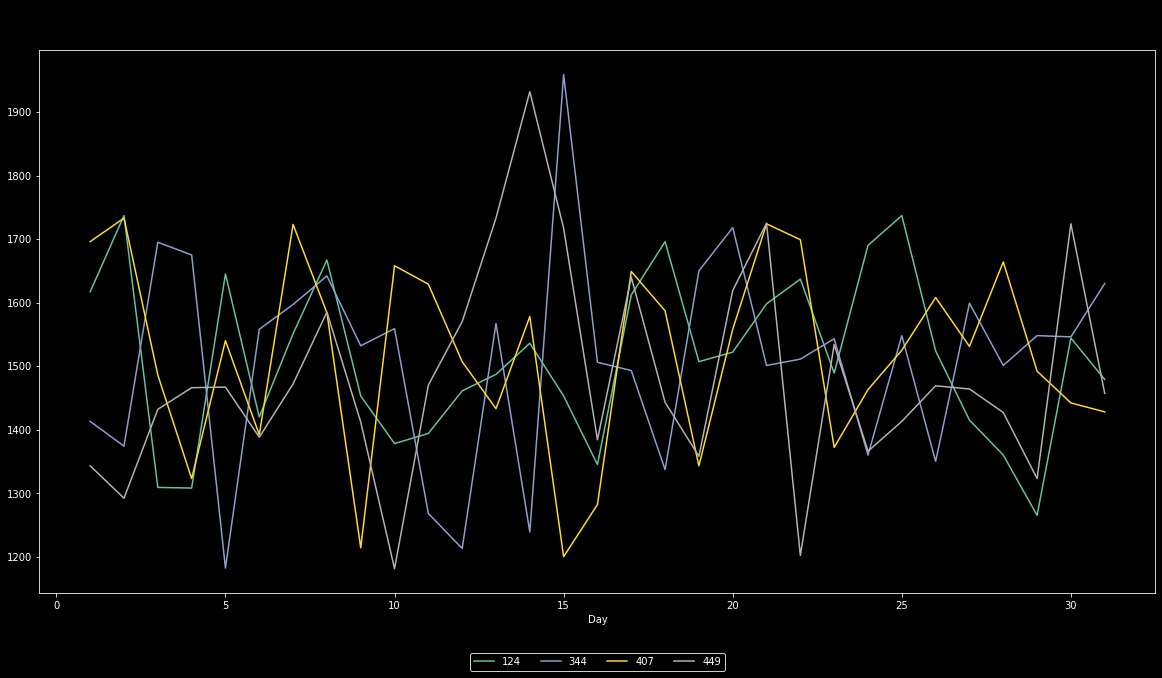

In [14]:
linechart(mar, 'Day', length=10, width=20)

### Create a bar chart that shows units sold by each hour of the day.

In [15]:
sales['hour'] = sales.SalesDate.dt.hour
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,MonthName,Day,Month,hour
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,February,5.0,2.0February,7.0
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,February,2.0,2.0February,16.0
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,May,3.0,5.0May,19.0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,April,7.0,4.0April,14.0
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,February,12.0,2.0February,15.0


In [16]:
def barchart(df, x, y, groups=None, length=8, width=14, title=""):
  plt.style.use(['dark_background'])
  plt.figure(figsize=(width,length))
  sns.barplot(data=df, x=x, y=y, hue=groups)
  plt.title(title + "\n", fontsize=16)

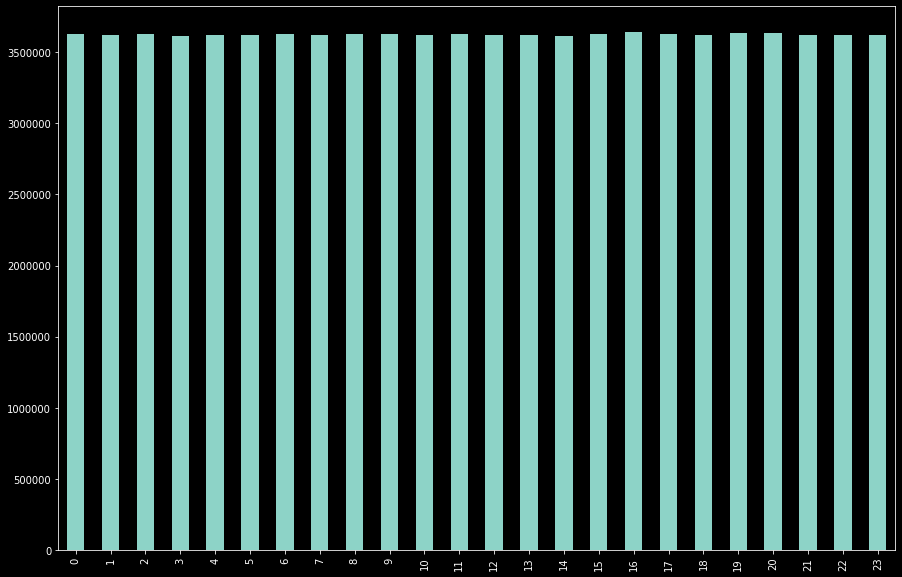

In [17]:
sales.groupby('hour', as_index=False).sum()['Quantity'].plot(kind='bar', figsize=(15,10))

In [18]:
sales.groupby('hour', as_index=False).sum()['Quantity']

0     3627044
1     3622628
2     3630784
3     3616872
4     3620283
5     3618830
6     3630426
7     3622932
8     3627311
9     3630320
10    3622972
11    3624601
12    3622606
13    3622071
14    3616971
15    3625062
16    3639479
17    3625779
18    3621951
19    3635022
20    3634563
21    3621242
22    3622237
23    3621561
Name: Quantity, dtype: int64

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [19]:
def heatmap(df, length=8, width=18, title=''):
  plt.figure(figsize=(width,length))
  ax = sns.heatmap(df, annot=True, fmt='.1f', cmap='Reds', linewidths=.01)
  plt.title(title + "\n", fontsize=16)

In [20]:
sales['weekday'] = sales.SalesDate.dt.dayofweek

In [21]:
heatmap_df = sales.pivot_table(index='hour', columns='weekday', values='Quantity', aggfunc='sum')
heatmap_df.head()

weekday,0.0,1.0,2.0,3.0,4.0,5.0,6.0
hour,,,,,,,
0.0,533709,532951,535415,504153,507959,505576,507281
1.0,532009,532359,531016,505289,509698,505507,506750
2.0,531342,540331,537964,506325,506458,510139,498225
3.0,531703,529542,534674,505194,505332,506429,503998
4.0,529269,530192,533272,505595,511244,507157,503554


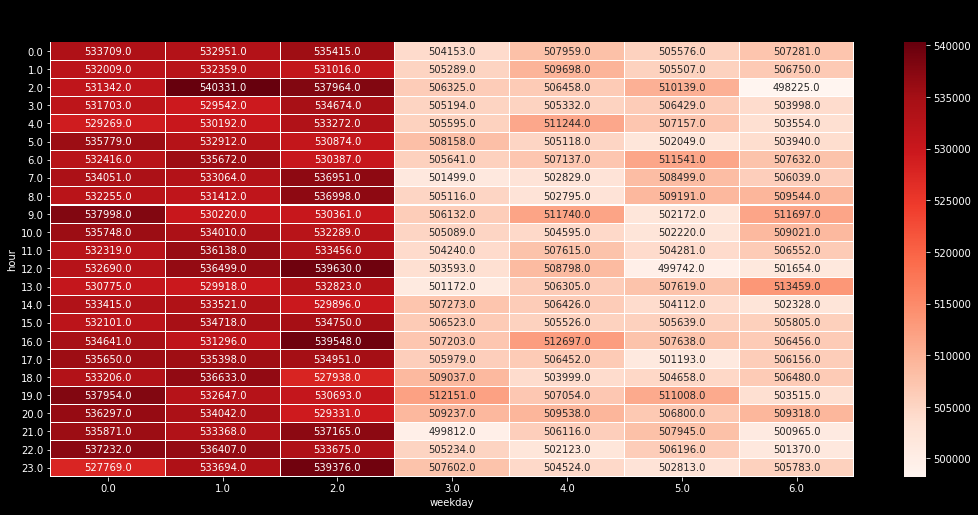

In [22]:
heatmap(heatmap_df)

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [23]:
products = np.random.choice(sales.ProductID.unique(), 20)
product_data = sales[sales.ProductID.isin(products)]
product_data.describe()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,Day,hour,weekday
count,2.994190e+05,299419.000000,299419.000000,299419.000000,299419.000000,59750.000000,296423.000000,296423.000000,296423.000000
mean,3.379164e+06,11.998343,49336.331899,207.083425,12.989316,0.150184,14.798494,11.501621,2.959575
std,1.953486e+06,6.640870,28555.114282,137.501990,7.221995,0.050000,8.835194,6.926812,2.002212
min,3.000000e+00,1.000000,1.000000,23.000000,1.000000,0.100000,1.000000,0.000000,0.000000
25%,1.684818e+06,6.000000,24505.000000,86.000000,7.000000,0.100000,7.000000,5.000000,1.000000
50%,3.377515e+06,12.000000,49370.000000,159.000000,13.000000,0.200000,14.000000,12.000000,3.000000
75%,5.073958e+06,18.000000,74142.500000,367.000000,19.000000,0.200000,22.000000,18.000000,5.000000
max,6.758124e+06,23.000000,98758.000000,450.000000,25.000000,0.200000,31.000000,23.000000,6.000000


In [24]:
product_data['Date'] = sales.SalesDate.dt.date
heatmap_pd = product_data.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')
heatmap_pd.head()

C:\Users\kalik\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ProductID,23,34,48,64,79,86,95,104,152,159,175,257,276,307,309,367,370,390,396,450
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01,1494,1213,1458,1318,1592,1429,1390,1370,1389,1559,1574,1461,1300,1473,1224,1390,1349,1390,1383,1289
2018-01-02,1416,1716,1531,1637,1605,1740,1466,1312,1346,1984,1585,1260,1372,1608,1396,1452,1399,1226,1597,1678
2018-01-03,1239,1128,1326,1533,1502,1546,1366,1694,1675,1646,1455,1469,1599,1255,1501,1715,1483,1343,1315,1468
2018-01-04,1564,1512,1659,1847,1408,1488,1498,1646,1527,1407,1433,1785,1362,1513,1460,1492,1615,1806,1818,1373
2018-01-05,1557,1189,1425,1483,1721,1457,1453,1341,1590,1337,1372,1567,1278,1679,1609,1632,1432,1557,1550,1683


In [25]:
heatmap_pd.corr()

ProductID,23,34,48,64,79,86,95,104,152,159,175,257,276,307,309,367,370,390,396,450
ProductID,,,,,,,,,,,,,,,,,,,,
23,1.000000,0.056625,0.049746,-0.187789,-0.023599,-0.182895,0.074219,-0.120022,-0.101232,-0.108142,0.047134,0.009192,0.022412,0.010471,-0.113750,-0.259266,-0.012795,0.222781,-0.055967,-0.157625
34,0.056625,1.000000,0.102150,-0.084130,0.104166,-0.073439,0.101299,-0.009124,0.032929,-0.031689,-0.039721,-0.008458,-0.049670,0.021253,-0.003885,-0.051538,-0.162560,0.136601,0.028149,-0.004993
48,0.049746,0.102150,1.000000,-0.196538,0.019504,0.022160,0.088164,0.152024,0.034483,0.004768,0.026123,-0.002659,-0.013589,0.036572,0.033451,-0.085133,-0.046511,-0.040311,-0.019127,0.045807
64,-0.187789,-0.084130,-0.196538,1.000000,-0.059695,0.022239,-0.138286,0.038191,0.012569,0.190354,0.022005,0.078440,0.020303,0.110950,-0.017214,0.228208,-0.017164,0.009304,0.094079,0.015271
79,-0.023599,0.104166,0.019504,-0.059695,1.000000,-0.139446,-0.022821,0.165358,0.008462,-0.169000,-0.031529,-0.042007,0.046995,0.004119,-0.007345,-0.095567,-0.000059,-0.016638,0.023306,-0.028656
86,-0.182895,-0.073439,0.022160,0.022239,-0.139446,1.000000,-0.114541,-0.132281,-0.057730,0.178063,-0.004525,0.008199,0.064731,-0.053637,0.025945,0.031073,-0.123779,-0.076971,0.024686,0.067369
95,0.074219,0.101299,0.088164,-0.138286,-0.022821,-0.114541,1.000000,-0.063164,0.153806,-0.016939,-0.171585,-0.136844,-0.024625,0.028259,-0.017739,-0.045586,-0.107797,-0.013300,0.022418,-0.034358
104,-0.120022,-0.009124,0.152024,0.038191,0.165358,-0.132281,-0.063164,1.000000,0.068654,0.045350,0.011078,0.082295,0.088215,-0.010313,0.018247,0.020115,-0.088048,-0.085234,0.106469,0.137840
152,-0.101232,0.032929,0.034483,0.012569,0.008462,-0.057730,0.153806,0.068654,1.000000,-0.079898,-0.237895,0.025831,0.157418,-0.119843,0.070491,0.127386,0.020955,0.068061,-0.095273,-0.062531


In [26]:
def the_best_map(corr):
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = False
  cmap = sns.diverging_palette(6, 255, as_cmap=True)
  with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(data=corr, cmap=cmap, annot=True, square=True, fmt='.1g', linewidths=0.5, center=0.7, mask=mask, vmin=0, vmax=1)
  plt.show()

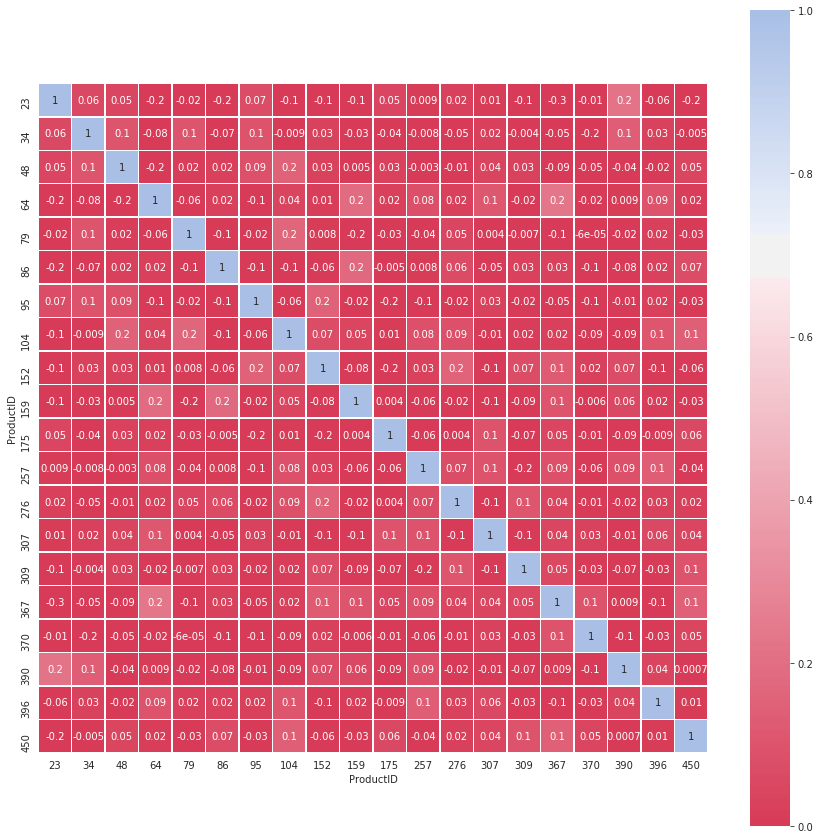

In [27]:
the_best_map(heatmap_pd.corr())

### Create a histogram showing the distribution of daily units sold.

In [28]:
def histogram(df, field=None, length=8, width=15, title=''):
  plt.figure(figsize=(width,length))
  sns.distplot(df[field])
  plt.title(title + "\n", fontsize=16)

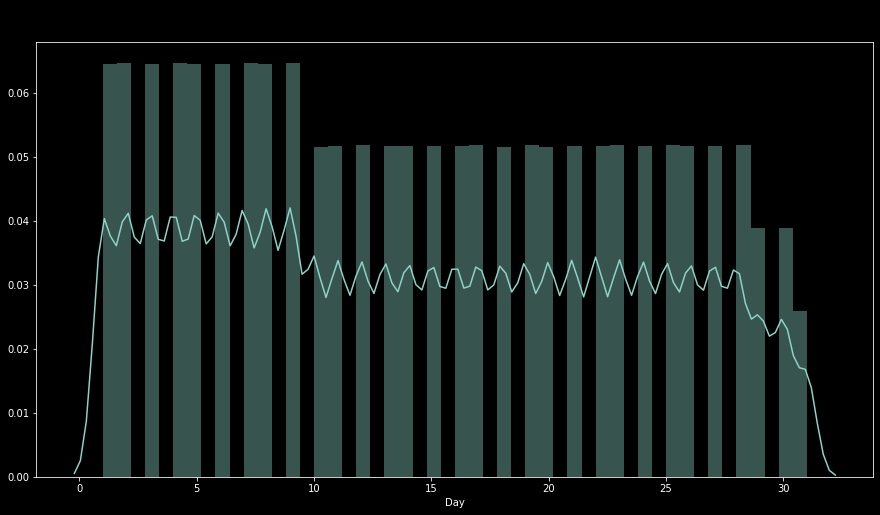

In [29]:
daily = sales[['Day', 'Quantity', 'MonthName']]
histogram(daily, 'Day')

### Create a violin plot showing the distribution of daily units sold by month.

In [30]:
def violin(df, x, y, length=8, width=15, title=''):
  plt.figure(figsize=(width,length))
  sns.violinplot(x=x, y=y, data=df)
  plt.title(title + "\n", fontsize=16)

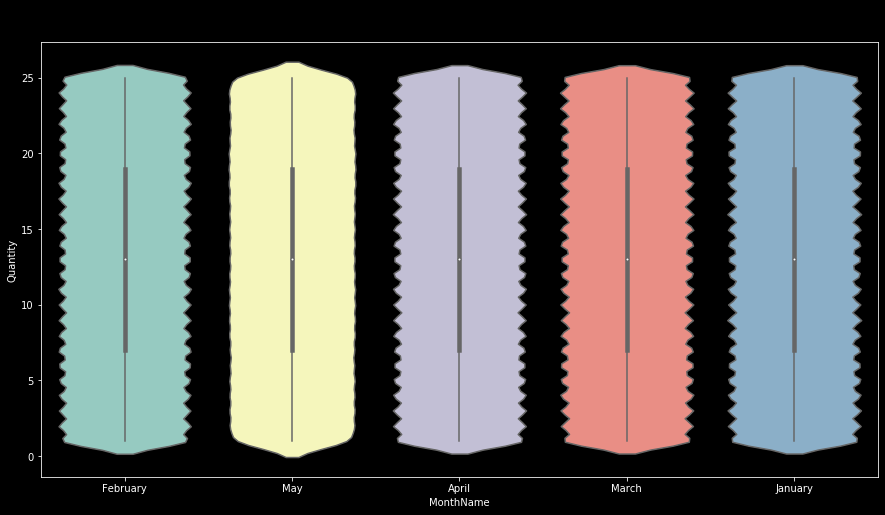

In [31]:
violin(daily, 'MonthName', 'Quantity')

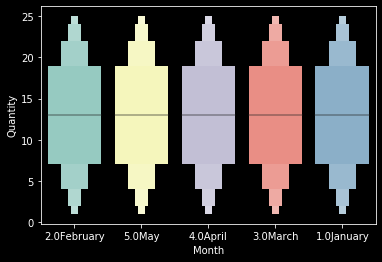

In [33]:
sns.boxenplot(x='Month', y='Quantity', data=sales)